## To predicts whether a passenger on the Titanic survived or not.
### Import the necessary packages

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [61]:
df=pd.read_csv('tested.csv')

### Displaying the top rows of dataset

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Display the shape of the dataset

In [63]:
df.shape

(418, 12)

### Display the datatypes in the dataset

In [64]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### View the info of the data frame that contains all details.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Checking for null values

In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data visualization

<Axes: xlabel='Survived', ylabel='count'>

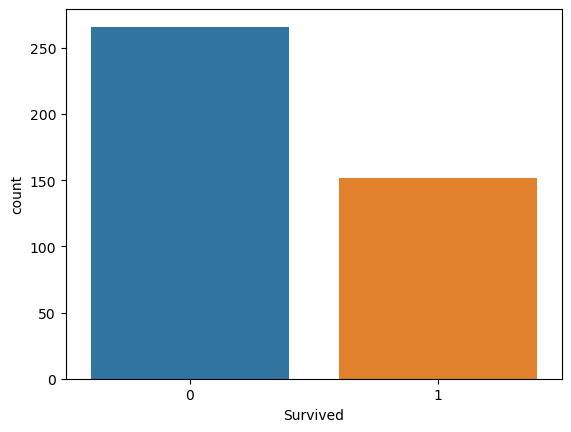

In [67]:
sns.countplot(x='Survived',data=df)

In [68]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

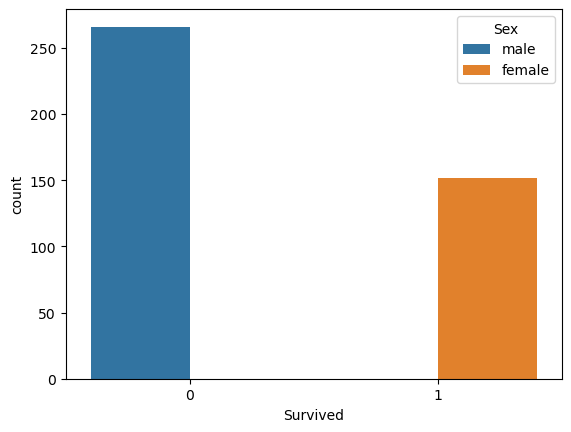

In [69]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

In [70]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,0,266
1,152,0


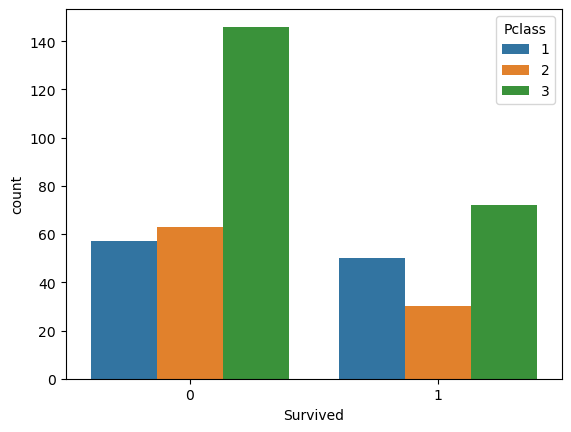

In [71]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

### Creating a contingency table

In [72]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


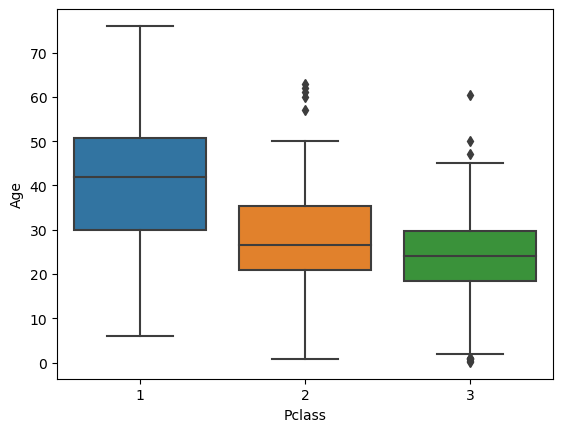

In [73]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

### Drop the unwanted columns

In [74]:
df=df.drop('Cabin',axis=1)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [76]:
df=df.dropna()

In [77]:
df.shape

(331, 11)

### Converting categorical data into a binary matrix 

In [78]:
df=pd.get_dummies(columns=['Sex','Embarked','Pclass'],data=df)

In [79]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,False,True,False,True,False,False,False,True
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,True,False,False,False,True,False,False,True
2,894,0,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,False,True,False,True,False,False,True,False
3,895,0,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,False,True,False,False,True,False,False,True
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,True,False,False,False,True,False,False,True


In [80]:
df=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)
df.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34.5,0,0,False,True,False,True,False,False,False,True
1,1,47.0,1,0,True,False,False,False,True,False,False,True
2,0,62.0,0,0,False,True,False,True,False,False,True,False
3,0,27.0,0,0,False,True,False,False,True,False,False,True
4,1,22.0,1,1,True,False,False,False,True,False,False,True


## Creating the model(classification)
### Fitting the Model and splitting the data into train and test datasets.

In [81]:
X=df.drop(['Survived'],axis=1)
Y=df['Survived']

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [83]:
model=LogisticRegression()

In [84]:
model.fit(X_train,Y_train)

LogisticRegression()

In [85]:
model.score(X_train,Y_train)

1.0

In [86]:
model.score(X_test,Y_test)

1.0

### Evaluation-Find the accuracy of the model and view the confusion matrix.

In [87]:
predictions=model.predict(X_test)

In [88]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

In [89]:
accuracy_score(Y_test,predictions)

1.0

<Axes: >

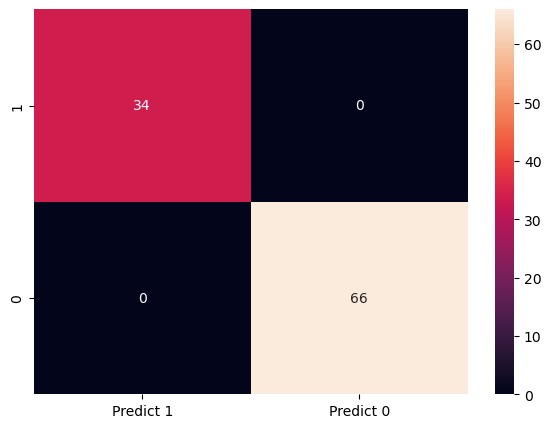

In [90]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Conclusion

In [91]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [92]:
accuracy=accuracy_score(Y_test,predictions)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00


### We can see that accuracy of the model is 100.00 percent which is perfect.